# Завдання 1: аналіз результатів A/B тесту
Наш продукт є мобільним застосунком з моделлю підписок, на якому ми провели монетизаційний A/B тест. У тесті була перевірена альтернативна підписка:

Control: користувачам пропонувалась місячна підписка за $5.99 з триденним пробним періодом

Treatment: користувачам пропонувалась тижнева підписка за $2.99 з триденним пробним періодом.

Тест проводився протягом тижня на локаціях з Tier-1: Австралія, Велика Британія, США та Канада.

## Завдання
Опис колонок
* user_id: ідентифікатор користувача
* install_date: дата інсталяції
* test_group: група, в яку користувач потрапив в A/B тесті
* country: код країни користувача
* trial: чи оформив користувач пробний період
* aid: чи здійснив користувач покупку після пробного періоду
* subscription_name: назва підписки, якщо користувач оформив пробний період
* revenue_1m: ревеню, яке приніс користувач протягом першого місяця з моменту закінчення пробного періоду.




#### Імпорт бібліотек та даних

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSU0mZ9bcAAri79KnOmrLWgD76fao2xKgmdJnHJ_GLv7nbSkfNuKnKcw_D_EiNruL6BOHme5p4zZq3W/pub?gid=2130106376&single=true&output=csv')

In [60]:
df.head()

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m
0,0000dd3fa4702a63d1b76aaffe1ab39b,2023-06-05,US,treatment,0,0,NaN,0.0
1,0001f27ab7e22228e54c8b2028b43f24,2023-06-07,AU,treatment,0,0,NaN,0.0
2,0006c5c547801308b36ea3cf669856ae,2023-06-07,AU,treatment,0,0,NaN,0.0
3,000d1a300263c5db91cbefa3852898a7,2023-06-07,AU,control,0,0,NaN,0.0
4,000e5e62e8746e467ed9f49ac5de3208,2023-06-06,US,treatment,0,0,NaN,0.0


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trial,15285.0,0.112725,0.316267,0.0,0.0,0.0,0.0,1.00
paid,15285.0,0.017337,0.130529,0.0,0.0,0.0,0.0,1.00
revenue_1m,15285.0,0.097297,0.782339,0.0,0.0,0.0,0.0,11.96


#### Чистка даних

In [65]:
df.isnull().sum()

user_id                  0
install_date             0
country                  0
test_group               0
trial                    0
paid                     0
subscription_name    13562
revenue_1m               0
dtype: int64

#### Перевіряємо на дублікати

In [64]:
df.duplicated().sum()

0

In [8]:
# df.drop_duplicates(inplace=True)

#### Групуємо на группи (А/В) , загальний обсяг кліентів 

In [33]:
df.groupby('test_group').agg({'user_id': 'count'})

,user_id
test_group,
control,7627
treatment,7658


In [66]:
df_user_count = df.groupby('user_id').agg({'test_group': 'count'}).reset_index()

In [67]:

df_user_count[df_user_count.test_group > 1]

,user_id,test_group


#### Перевіряємо які є значення у колонках

In [69]:
df.trial.unique()

array([0, 1])

#### Групуємо на группи (А/В) , ті які спробували підписку

In [70]:
df.groupby('test_group').agg({'trial': 'sum'})

,trial
test_group,
control,925
treatment,798


#### Групуємо на группи (А/В) , ті які спробували підписку та її купили

In [14]:
df_user_trail = df[df.trial == 1]

In [72]:
df_user_trail.groupby('test_group').agg({'user_id': 'count',
                                         'paid': 'sum'})

,user_id,paid
test_group,,
control,925,116
treatment,798,149


#### Перевіряємо  P-value за допомогою калькулятора достовірності A/B тестування

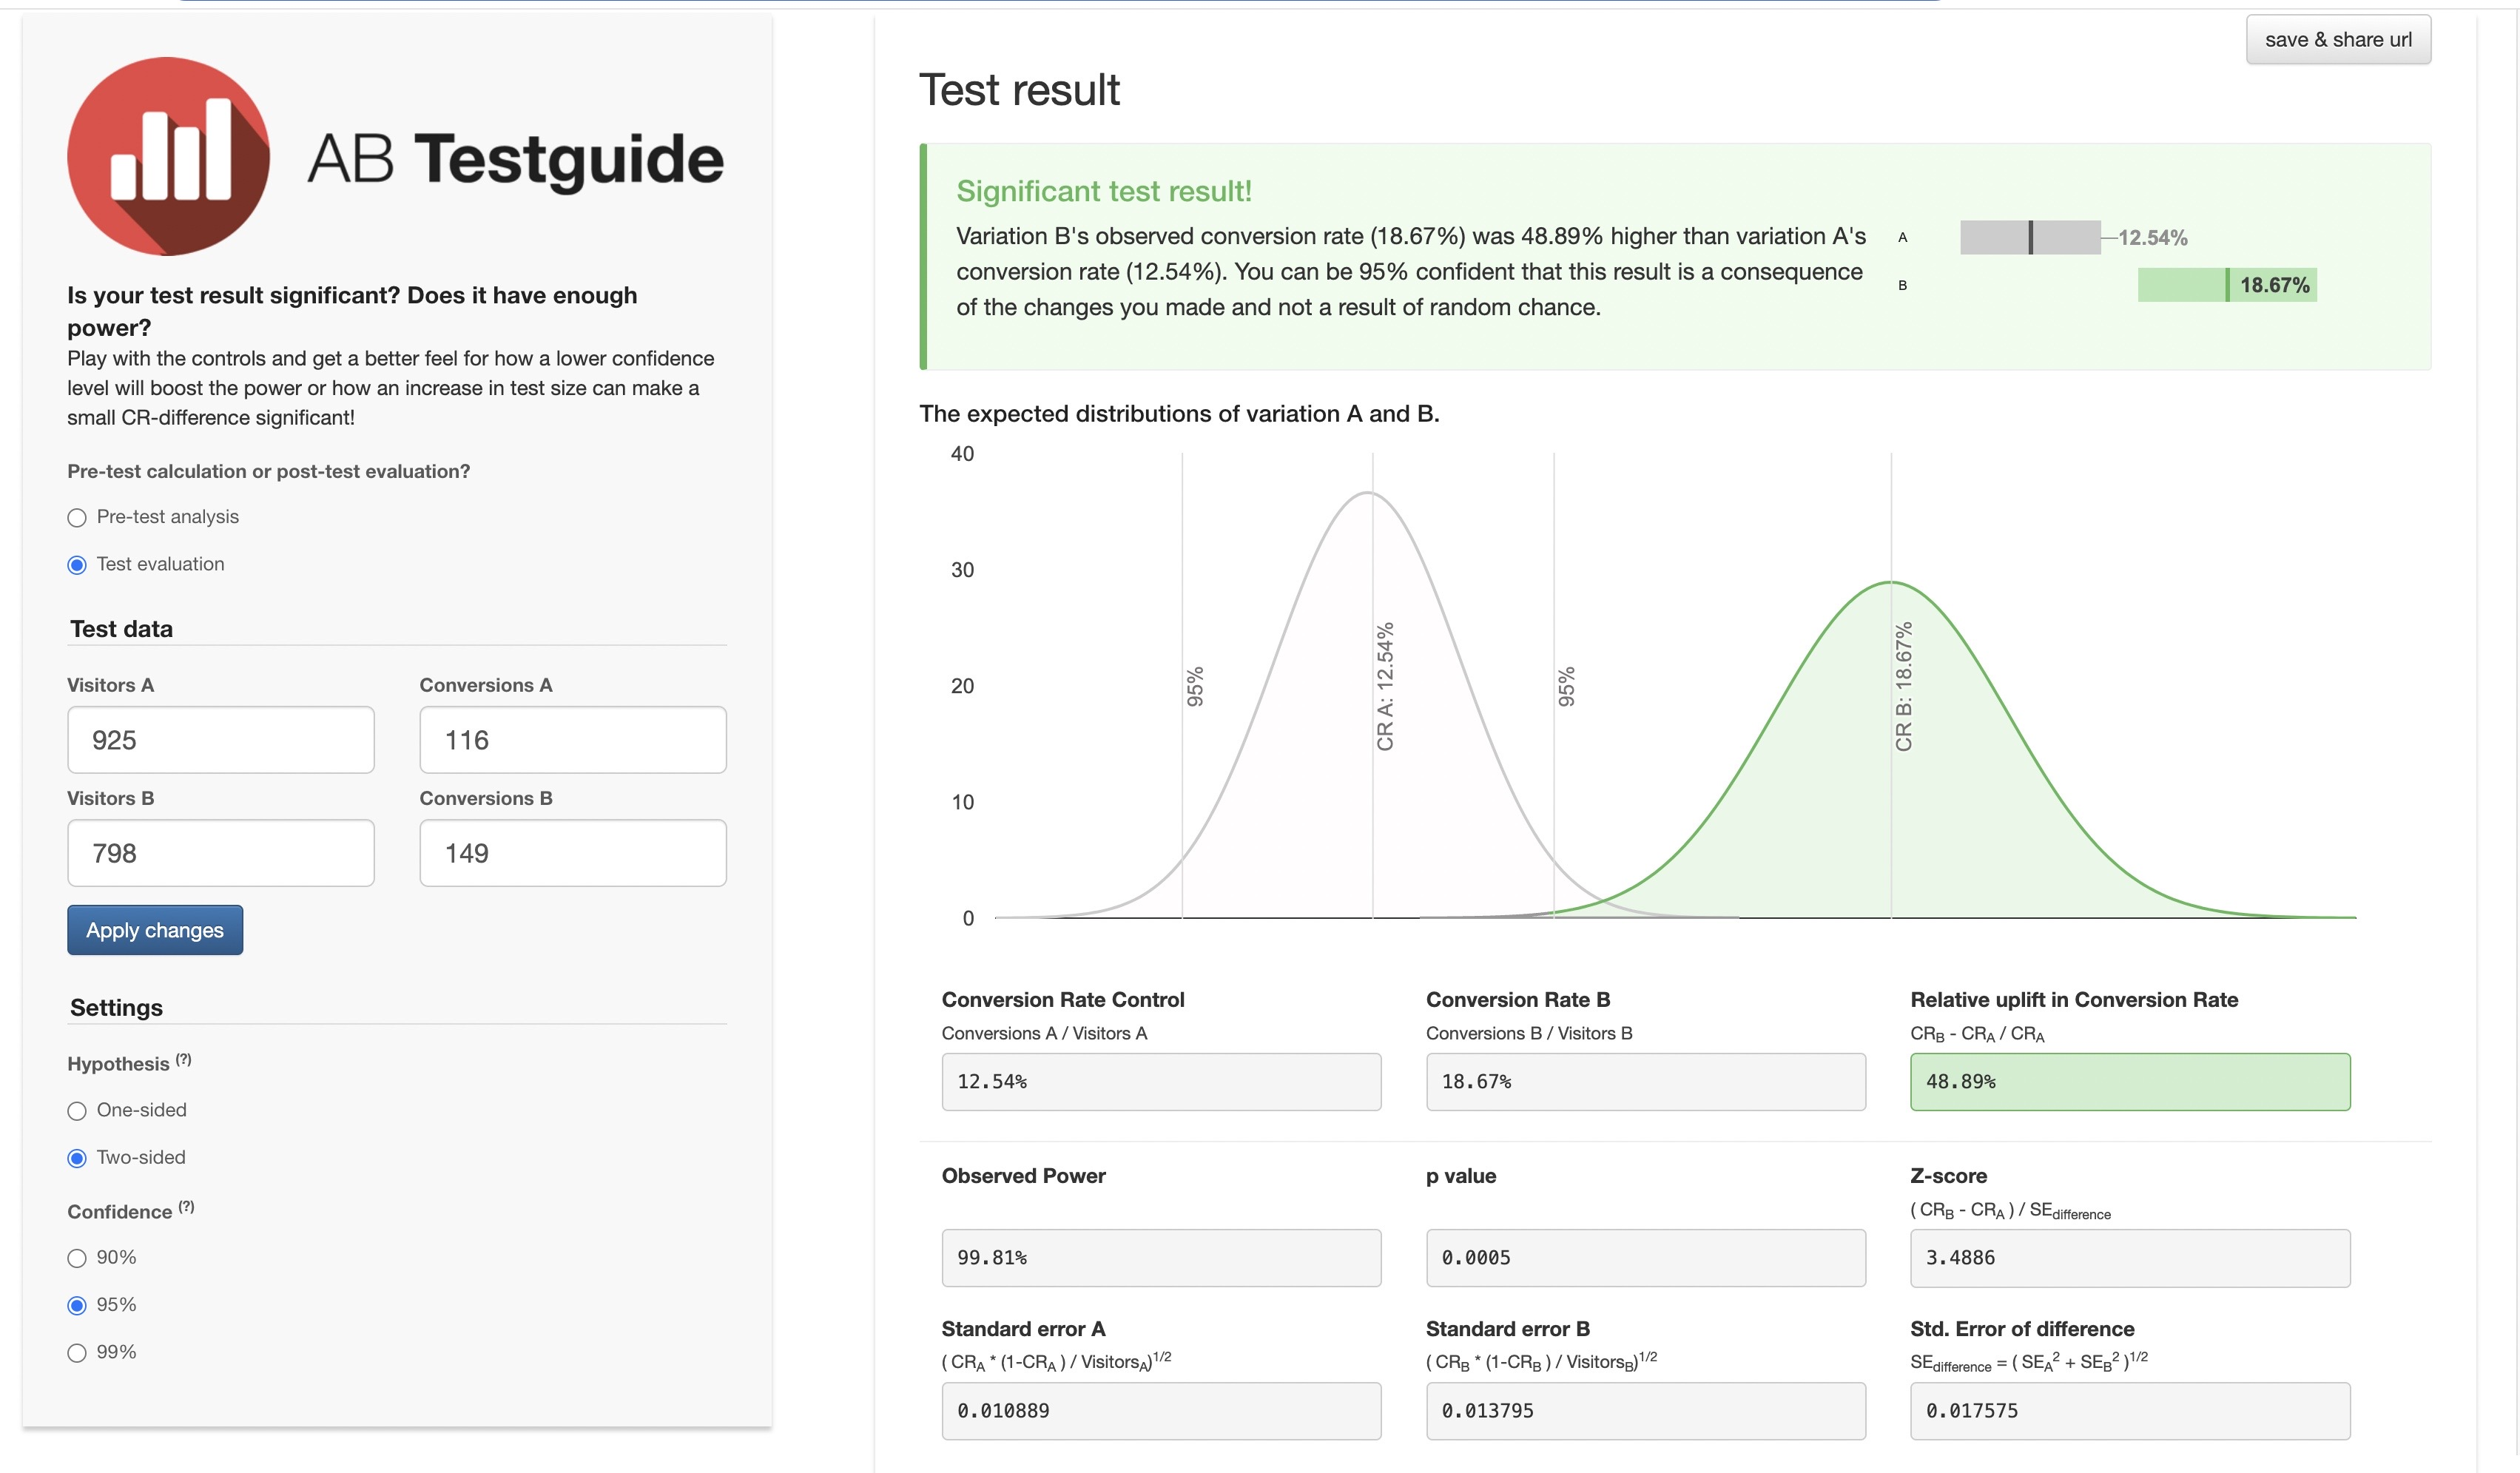

In [76]:
from IPython.display import Image

Image('Conversion.jpg', width=900, height=900)


####  Пі вэлью = 0.0005 воно меньше за 5%(0.05) та означає что рузультат тестування не є випадковим 

#### Сгрупоємо по країнам та подивимось росподіл по країнам 

In [86]:
df_country = df.groupby(['test_group', 'country']).agg({'user_id': 'count'}).reset_index()

In [87]:
df_country

,test_group,country,user_id
0,control,AU,1928
1,control,CA,1936
2,control,GB,1846
3,control,US,1917
4,treatment,AU,1835
5,treatment,CA,1959
6,treatment,GB,1991
7,treatment,US,1873


#### Завізуалізуємо це за допомогою стовпчікової діаграми за допомогою бібліотеки "seaborn" та "matplotlib"


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

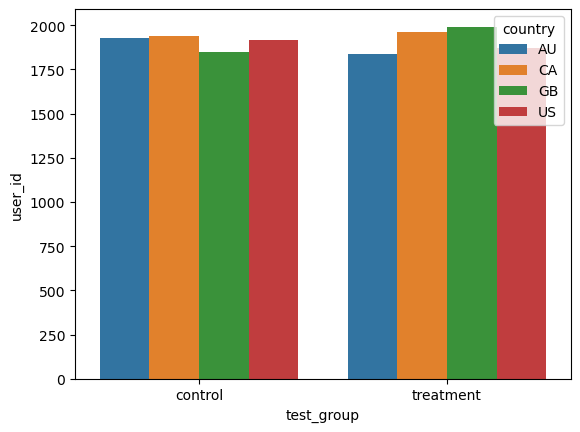

In [85]:
sns.barplot(df_country, x="test_group", y="user_id", hue="country")
plt.show()

#### Розподіл між країнама майже однаковий


#### Перневіряємо який тип даних у Датафреймі та переводимо тип даних "object" в "datetime64" для зручності подальшого використання


In [89]:
df.dtypes

user_id               object
install_date          object
country               object
test_group            object
trial                  int64
paid                   int64
subscription_name     object
revenue_1m           float64
dtype: object

In [90]:
df['install_date'] = pd.to_datetime(df['install_date'])

In [91]:
df.dtypes

user_id                      object
install_date         datetime64[ns]
country                      object
test_group                   object
trial                         int64
paid                          int64
subscription_name            object
revenue_1m                  float64
dtype: object

In [92]:
df.install_date.min()

Timestamp('2023-06-01 00:00:00')

In [93]:
df.install_date.max()

Timestamp('2023-06-07 00:00:00')

In [94]:
df.head(10)

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m
0,0000dd3fa4702a63d1b76aaffe1ab39b,2023-06-05,US,treatment,0,0,NaN,0.0
1,0001f27ab7e22228e54c8b2028b43f24,2023-06-07,AU,treatment,0,0,NaN,0.0
2,0006c5c547801308b36ea3cf669856ae,2023-06-07,AU,treatment,0,0,NaN,0.0
3,000d1a300263c5db91cbefa3852898a7,2023-06-07,AU,control,0,0,NaN,0.0
4,000e5e62e8746e467ed9f49ac5de3208,2023-06-06,US,treatment,0,0,NaN,0.0
5,000e65027879059fe2a814be4ff21316,2023-06-04,CA,treatment,0,0,NaN,0.0
6,000eb23cf1caf152d9b8d4ec2441e085,2023-06-02,AU,control,0,0,NaN,0.0
7,0013a6c091188301710271b8195a999a,2023-06-03,GB,treatment,0,0,NaN,0.0
8,001f99c190cb677eadbbe144a5c7eb02,2023-06-01,CA,treatment,0,0,NaN,0.0
9,002066ee39aacf3dbe4294be1a08bd77,2023-06-06,GB,control,0,0,NaN,0.0


#### Рахуємо кількість інсталяцій по кожному дню для "control" группи та "treatment" группи



In [27]:
df.groupby(['test_group', 'install_date']).agg({'user_id': 'count'})

user_id
test_group install_date         
control    2023-06-01       1193
           2023-06-02        934
           2023-06-03        936
           2023-06-04       1033
           2023-06-05       1244
           2023-06-06       1165
           2023-06-07       1122
treatment  2023-06-01       1235
           2023-06-02        983
           2023-06-03        962
           2023-06-04       1057
           2023-06-05       1228
           2023-06-06       1082
           2023-06-07       1111

#### Рахуємо "revenue" , яке приніс користувач протягом першого місяця з моменту закінчення пробного періоду для кожної группи

In [28]:
df.groupby('test_group').agg({'revenue_1m': 'sum', 
                              'user_id': 'count'})

,revenue_1m,user_id
test_group,,
control,694.84,7627
treatment,792.35,7658


#### Варіант B показав на 48.89% вищу конверсію, ніж варіант A. Імовірність виграшу результату B – 99.98%. Взагалі можно зробити висновок стосовно А/Б тестування , що альтернативна группа (treatment) показала кращі результати по Revenue (виручка)  риблизно на 12.3% більше за результат (control) групы	 